
------------------------------------------------------

ROWS and COLUMNS of the start data: (7418, 5)
Size of the data to be processed :  1238
Percentage of data that will be processed:  17%
--------------------------------------------------------


Total Number of Words in the Index:  19109
Number of CLASSES/LABELS:  62
Number of Train data:  866
Number of test Data:  372
Epoch 1/30


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0486 - loss: 4.0820 - val_accuracy: 0.0753 - val_loss: 3.9635
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0908 - loss: 3.8449 - val_accuracy: 0.0780 - val_loss: 3.9001
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1129 - loss: 3.6747 - val_accuracy: 0.1129 - val_loss: 3.8087
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1742 - loss: 3.4916 - val_accuracy: 0.1398 - val_loss: 3.6284
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2035 - loss: 3.2104 - val_accuracy: 0.1559 - val_loss: 3.4623
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2781 - loss: 2.7855 - val_accuracy: 0.2070 - val_loss: 3.2833
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3840 - loss: 2.5511 - val_accuracy: 0.2151 - val_loss: 3.1835
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4793 - loss: 2.0831 - val_accuracy: 0.2446 - val_loss: 3.0296
Epo

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)        │ (None, 100, 128)       │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_30 (Conv1D)              │ (None, 96, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_30         │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 703,676 (2.68 MB)

 Trainable params: 234,558 (916.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 469,118 (1.79 MB)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3479 - loss: 3.2928 


Test Loss: 3.488368272781372
Test Accuracy: 32.258063554763794
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 



Number of words predicted correctly is:  120


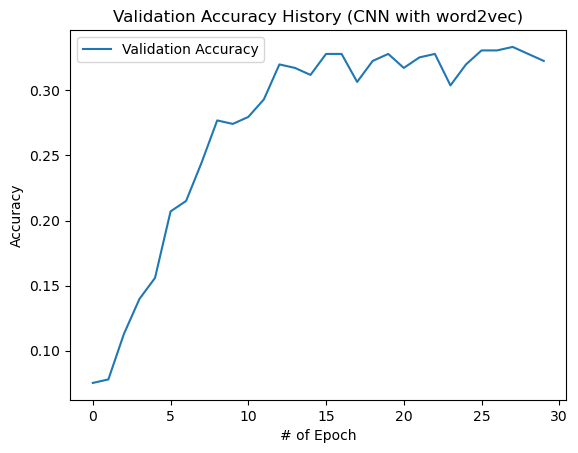

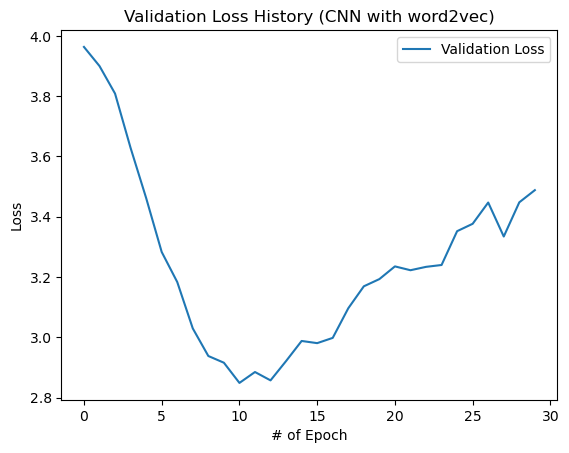



 ************** THE END ***************


In [40]:
import gensim
import pandas as pd
import numpy as np
import tensorflow
import reusables as ru
import matplotlib.pyplot as plt
from importlib import reload
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.keyedvectors import KeyedVectors

# --------------------------------------------------------------------------------------------------------------------
word2vec_file = 'GoogleNews-vectors-negative300.bin'
cnn_model_file = 'cnn_model.keras'

# Load the CSV
file_path = "../DATA/subject_headings_after_cleanup_without_blanks.csv"

# Column to use
COLUMN_TO_PROCESS =['Title', 'Abstract', 'Subject Headings']

# Model Parameters
NUMBER_OF_WORDS=1000
MAX_LENGTH=100
EPOCH=30
BATCH_SIZE=16
OUTPUT_DIM=128
INPUT_LENGTH=100
TEST_SIZE=0.3
RANDOM_STATE=42
DROPOUT=0.3

SUBSET=10

# --------------------------------------------------------------------------------------------------------------------
# Read the raw file
reload(ru)

df = pd.read_csv(file_path)

# filter the college
filter_by_college = 'ALL'
#filter_by_college = 'College of Education'
#filter_by_college = 'College of Engineering and Computer Science'
#filter_by_college = 'College of Science'

if filter_by_college != 'ALL':
    selected_data = df[df['College'] == filter_by_college ].reset_index(drop=True)
else:
    selected_data = df

# pull records that have subject headings greater than n
selected_data = ru.get_df_subset(selected_data, SUBSET)

# selected the Abstract and Heading columns
selected_data = selected_data[COLUMN_TO_PROCESS]

abstracts = selected_data['Title'].astype(str).values + " " + selected_data['Abstract'].astype(str).values
headings = selected_data['Subject Headings'].astype(str).values

# Summary
ru.data_info(df, selected_data, abstracts, headings)

# Tokenize the titles
tokenizer = Tokenizer(num_words=NUMBER_OF_WORDS)
abstracts_padded, word_index = ru.encode_abstract(abstracts, tokenizer, MAX_LENGTH)
print("\nTotal Number of Words in the Index: ", len(word_index))

# Encode the headings
label_encoder = LabelEncoder()
label_encoded_to_int = ru.encode_label(headings, label_encoder)
num_classes = len(label_encoder.classes_)

# Convert headings to one-hot encoding
headings_encoded = to_categorical(label_encoded_to_int, num_classes=num_classes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(abstracts_padded, headings_encoded, test_size=TEST_SIZE, random_state=42)

print("Number of CLASSES/LABELS: ", num_classes)
print("Number of Train data: ", len(y_train))
print("Number of test Data: ", len(y_test))

# Retrieve word2vec Embedding
#embedding_dim, embedding_matrix = ru.get_word2vec_embedding(word2vec_file, tokenizer, NUMBER_OF_WORDS)

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=NUMBER_OF_WORDS, output_dim=OUTPUT_DIM, input_length=INPUT_LENGTH))
#model.add(Embedding(input_dim=NUMBER_OF_WORDS, output_dim=embedding_dim, weights=[embedding_matrix],  trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

# Summary Table
model.summary()

#save the model to a file
#model.save(cnn_model_file)

# --------------------------------------------------------------------------------------
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print("\n")
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {100 * accuracy}")

# Predict vs Actual
ru.predict_this (X_test, y_test, label_encoder, model)

# Plot Accuracy
ru.plot_this('val_accuracy', 'Validation Accuracy History (CNN with word2vec)', 'Validation Accuracy',  '# of Epoch', 'Accuracy', history )
# Plot Loss
ru.plot_this('val_loss', 'Validation Loss History (CNN with word2vec)', 'Validation Loss', '# of Epoch', 'Loss', history )

print ("\n\n ************** THE END ***************")
